<a href="https://colab.research.google.com/github/sepse/COVAir-Balkans/blob/main/balkan_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np 
import pandas as pd
from datetime import datetime
import folium

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [16]:
covid = '/content/drive/MyDrive/Colab Notebooks/Balkan Air&COVID/covid/owid-covid-data.csv'

In [17]:
cov = pd.read_csv(covid, sep=',')

In [18]:
cov = cov.drop(['iso_code', 'continent'], axis=1)
cov.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [19]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188788 entries, 0 to 188787
Data columns (total 65 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   location                                    188788 non-null  object 
 1   date                                        188788 non-null  object 
 2   total_cases                                 181315 non-null  float64
 3   new_cases                                   181040 non-null  float64
 4   new_cases_smoothed                          179866 non-null  float64
 5   total_deaths                                162915 non-null  float64
 6   new_deaths                                  162903 non-null  float64
 7   new_deaths_smoothed                         161741 non-null  float64
 8   total_cases_per_million                     180478 non-null  float64
 9   new_cases_per_million                       180203 non-null  float64
 

In [20]:
cov['date'] = pd.to_datetime(cov['date'])

In [21]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188788 entries, 0 to 188787
Data columns (total 65 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   location                                    188788 non-null  object        
 1   date                                        188788 non-null  datetime64[ns]
 2   total_cases                                 181315 non-null  float64       
 3   new_cases                                   181040 non-null  float64       
 4   new_cases_smoothed                          179866 non-null  float64       
 5   total_deaths                                162915 non-null  float64       
 6   new_deaths                                  162903 non-null  float64       
 7   new_deaths_smoothed                         161741 non-null  float64       
 8   total_cases_per_million                     180478 non-null  float64      

In [22]:
print(f"The available data is between {cov['date'].min()} and {cov['date'].max()}")

The available data is between 2020-01-01 00:00:00 and 2022-05-23 00:00:00


In [23]:
balkan = (cov.loc[cov['location'].isin(['Albania','Kosovo', 'North Macedonia', 'Serbia', 'Bosnia and Herzegovina', 'Croatia'])])
 
balkan.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1651,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
1652,Albania,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
1653,Albania,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
1654,Albania,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
1655,Albania,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,-190.8,-4.34,2.88,-66.412942


In [24]:
kosovo = (balkan.loc[balkan['location'].isin(['Kosovo'])])


In [25]:
kosovo.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.118461,0.162946,0.961962,-0.120392,-0.167961,1.000000,0.118461,0.162946,0.961962,...,NaN,NaN,NaN,NaN,NaN,NaN,0.933997,0.618524,-0.273970,0.933997
new_cases,0.118461,1.000000,0.824765,0.124600,0.568284,0.324427,0.118461,1.000000,0.824765,0.124600,...,NaN,NaN,NaN,NaN,NaN,NaN,0.230422,0.198137,0.101074,0.230422
new_cases_smoothed,0.162946,0.824765,1.000000,0.161335,0.368234,0.445759,0.162946,0.824765,1.000000,0.161335,...,NaN,NaN,NaN,NaN,NaN,NaN,0.253557,0.195938,0.048081,0.253557
total_deaths,0.961962,0.124600,0.161335,1.000000,-0.087715,-0.116988,0.961962,0.124600,0.161335,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.992715,0.770016,-0.198461,0.992715
new_deaths,-0.120392,0.568284,0.368234,-0.087715,1.000000,0.701590,-0.120392,0.568284,0.368234,-0.087715,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.003803,0.145190,0.582279,-0.003803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
human_development_index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
excess_mortality_cumulative_absolute,0.933997,0.230422,0.253557,0.992715,-0.003803,0.005289,0.933997,0.230422,0.253557,0.992715,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.838913,-0.130270,1.000000
excess_mortality_cumulative,0.618524,0.198137,0.195938,0.770016,0.145190,0.245613,0.618524,0.198137,0.195938,0.770016,...,NaN,NaN,NaN,NaN,NaN,NaN,0.838913,1.000000,0.240004,0.838913
excess_mortality,-0.273970,0.101074,0.048081,-0.198461,0.582279,0.708162,-0.273970,0.101074,0.048081,-0.198461,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.130270,0.240004,1.000000,-0.130270


In [26]:
kos = kosovo[['date','total_cases','new_cases','total_deaths','new_deaths','new_tests','total_tests']]

kos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 90351 to 91151
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          801 non-null    datetime64[ns]
 1   total_cases   801 non-null    float64       
 2   new_cases     801 non-null    float64       
 3   total_deaths  792 non-null    float64       
 4   new_deaths    792 non-null    float64       
 5   new_tests     103 non-null    float64       
 6   total_tests   179 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 50.1 KB


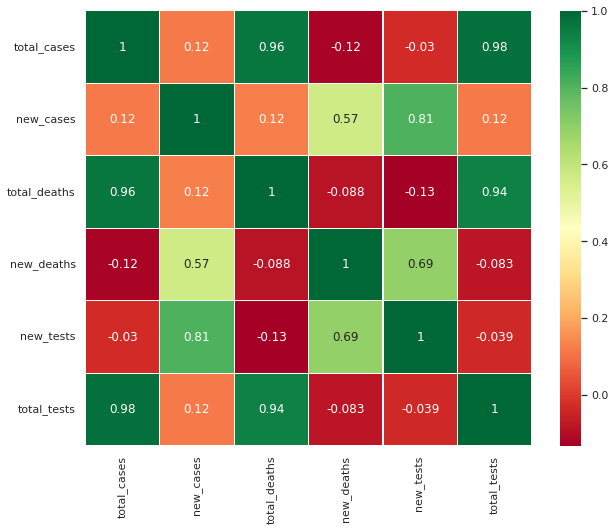

In [27]:
sns.heatmap(kos.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

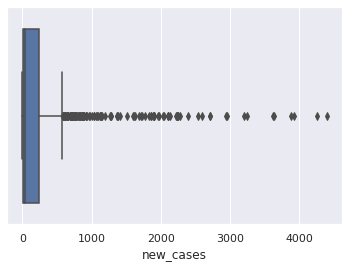

In [28]:
sns.boxplot(x=kos['new_cases'])


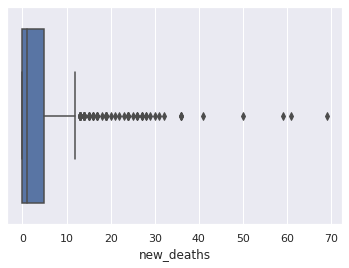

In [29]:
sns.boxplot(x=kos['new_deaths'])

In [30]:
print('Highest daily cases:',kos['new_cases'].max())
print('Highest daily deaths:',kos['new_deaths'].max())
print('Highest daily new test:',kos['new_tests'].max())
print('Average daily cases:',kos['new_cases'].mean())
print('Average daily tests:',kos['new_tests'].mean())
print('Average daily deaths:',kos['new_deaths'].mean())



Highest daily cases: 4397.0
Highest daily deaths: 69.0
Highest daily new test: 14284.0
Average daily cases: 285.0299625468165
Average daily tests: 4095.6796116504856
Average daily deaths: 3.9633838383838382


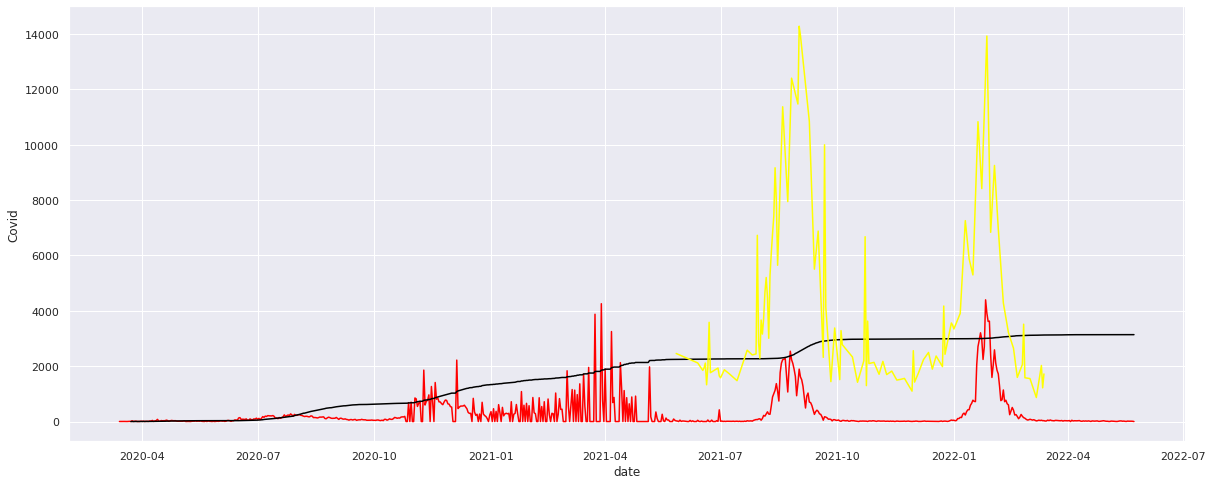

In [31]:

sns.set_style('darkgrid')

# Construct plot
#sns.lineplot(x = "date", y = "total_cases", data = kos)
sns.set(rc={'figure.figsize':(20,8)})
#plt.show()

sns.lineplot(x="date", y="new_cases", data=kos, color='red')
sns.lineplot(x="date", y="total_deaths", data=kos, color='black')
sns.lineplot(x="date", y="new_tests", data=kos, color='yellow')
# set label
plt.ylabel("Covid")

plt.show()

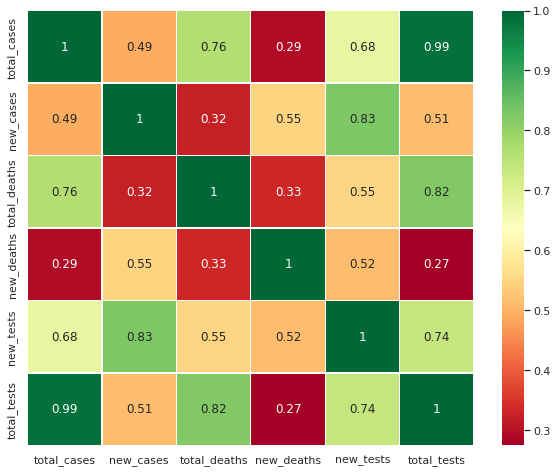

In [32]:
bal = balkan[['date','total_cases','new_cases','total_deaths','new_deaths','new_tests','total_tests']]

sns.heatmap(bal.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

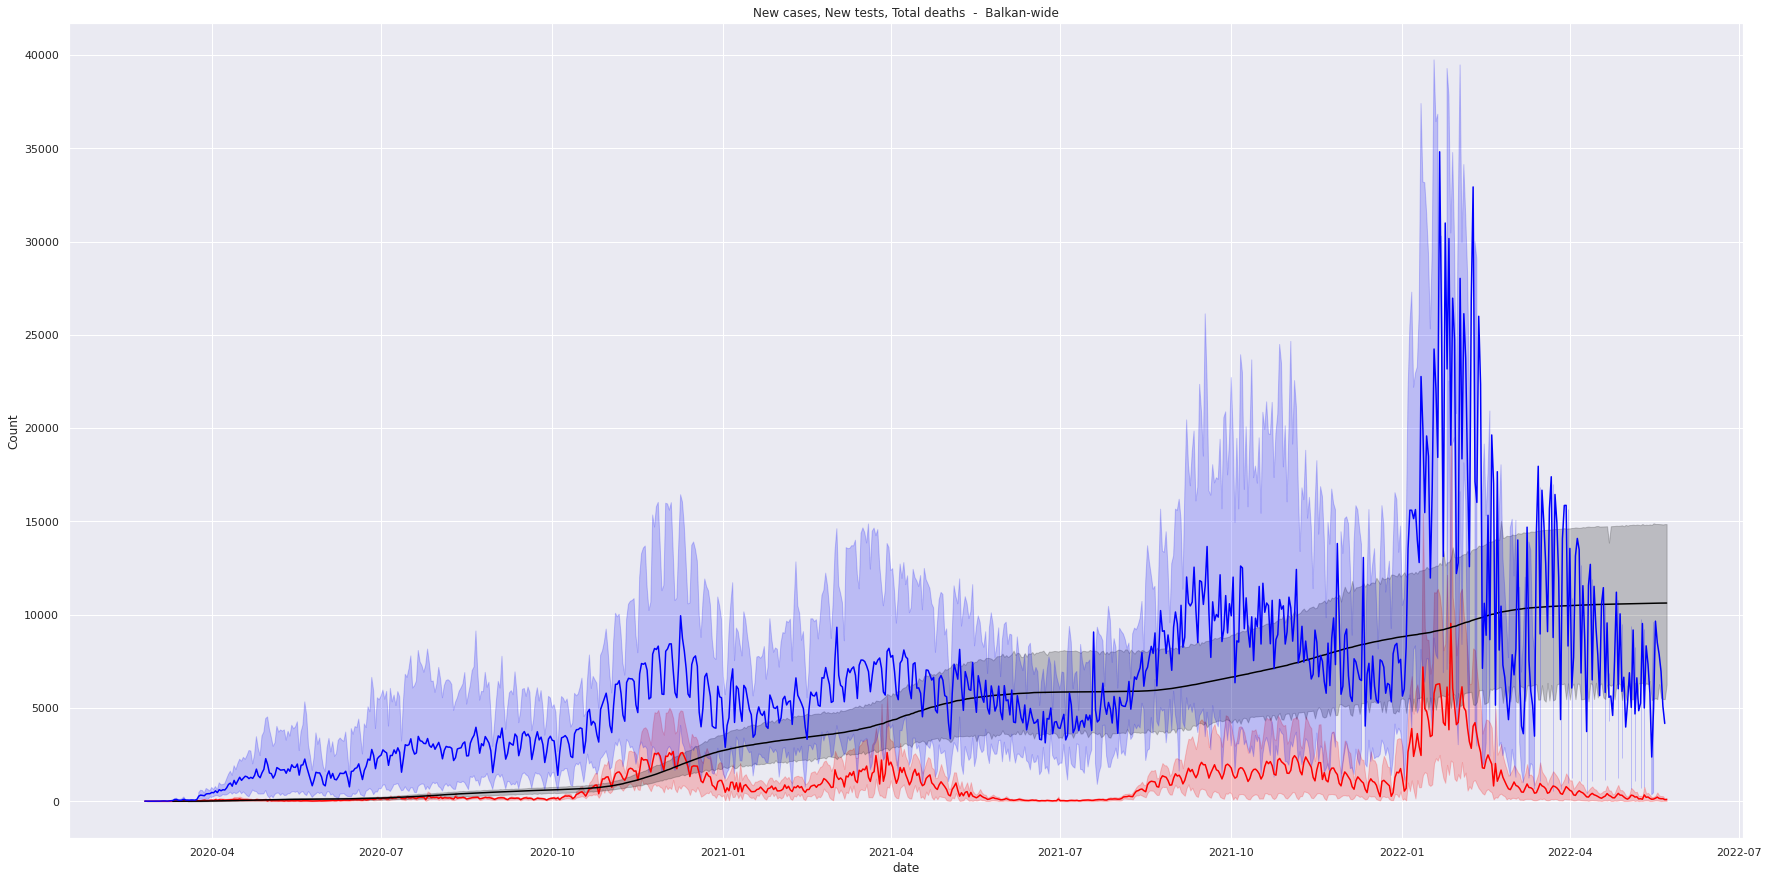

In [55]:
sns.set_style('darkgrid')

# Construct plot
#sns.lineplot(x = "date", y = "total_cases", data = kos)
sns.set(rc={'figure.figsize':(30,15)})
#plt.show()

sns.lineplot(x="date", y="new_cases", data=bal, color='red').set_title("New cases, New tests, Total deaths  -  Balkan-wide")
sns.lineplot(x="date", y="total_deaths", data=bal, color='black')
sns.lineplot(x="date", y="new_tests", data=bal, color='blue')
# set label
plt.ylabel("Count")

plt.show()

Text(0.5, 1.0, 'Croatia')

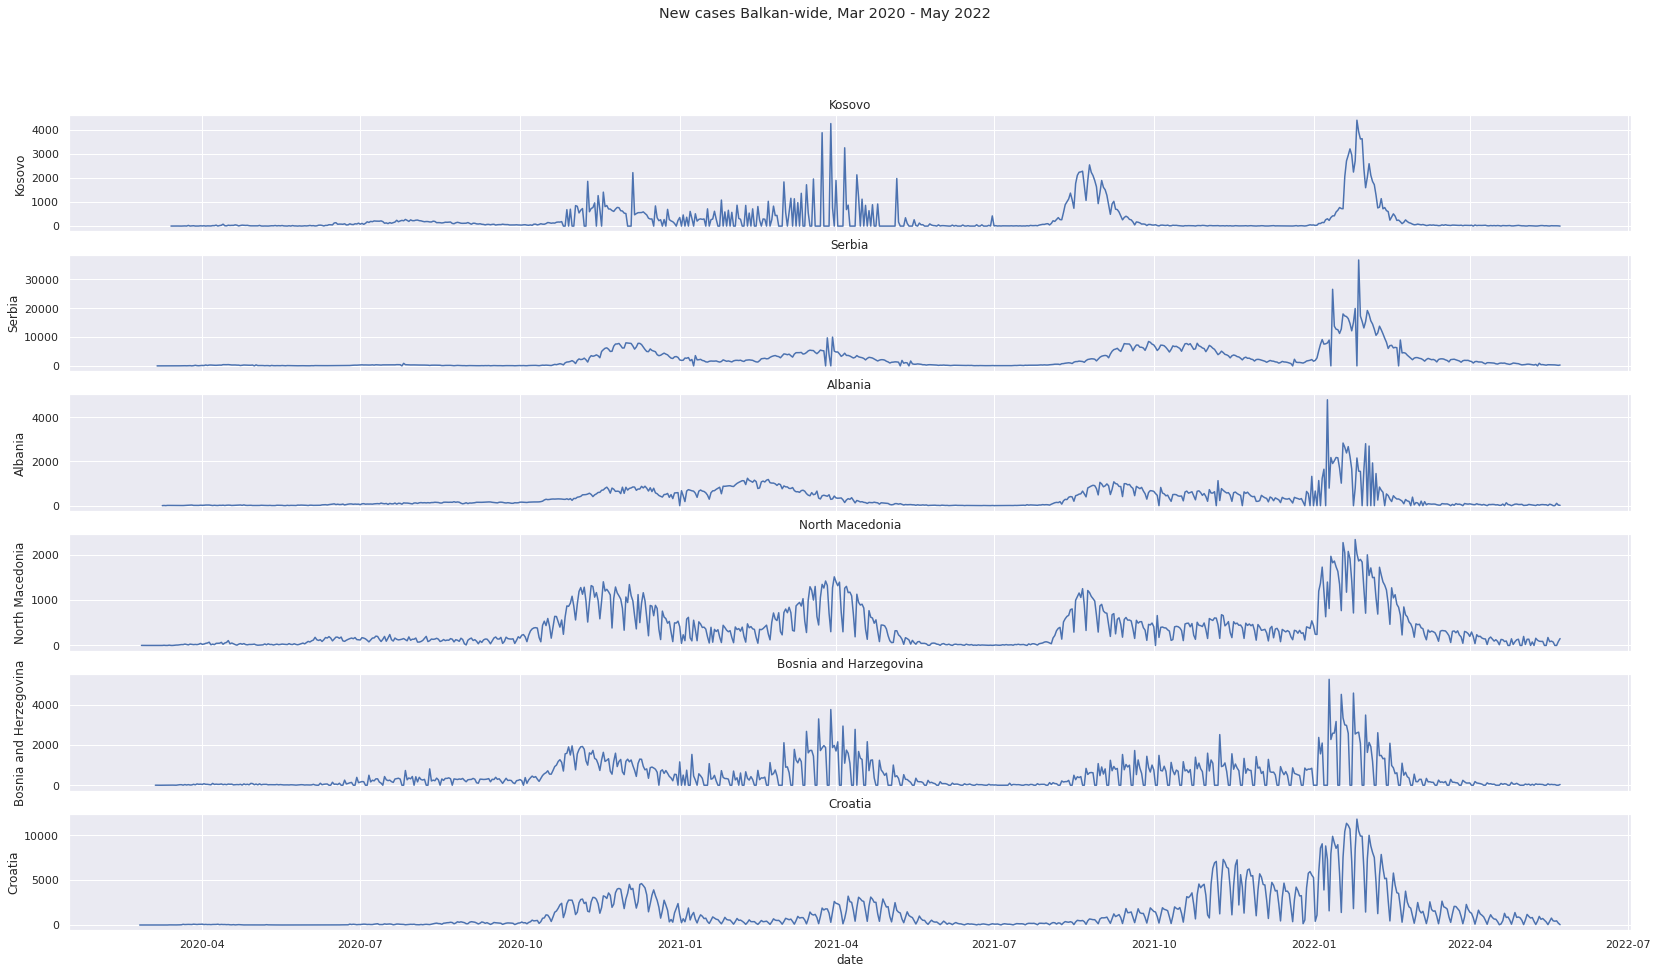

In [50]:
bal_pivot = balkan.pivot(index='date', columns='location', values='new_cases')

fig, axes = plt.subplots(6, 1, figsize=(28, 15), sharex=True)
fig.suptitle('New cases Balkan-wide, Mar 2020 - May 2022')

sns.lineplot(ax=axes[0], x=bal_pivot.index, y=bal_pivot['Kosovo'], data=bal_pivot).set_title("Kosovo")
sns.lineplot(ax=axes[1], x=bal_pivot.index, y=bal_pivot['Serbia'], data=bal_pivot).set_title("Serbia")
sns.lineplot(ax=axes[2], x=bal_pivot.index, y=bal_pivot['Albania'], data=bal_pivot).set_title("Albania")
sns.lineplot(ax=axes[3], x=bal_pivot.index, y=bal_pivot['North Macedonia'], data=bal_pivot).set_title("North Macedonia")
sns.lineplot(ax=axes[4], x=bal_pivot.index, y=bal_pivot['Bosnia and Herzegovina'], data=bal_pivot).set_title("Bosnia and Harzegovina")
sns.lineplot(ax=axes[5], x=bal_pivot.index, y=bal_pivot['Croatia'], data=bal_pivot).set_title("Croatia")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


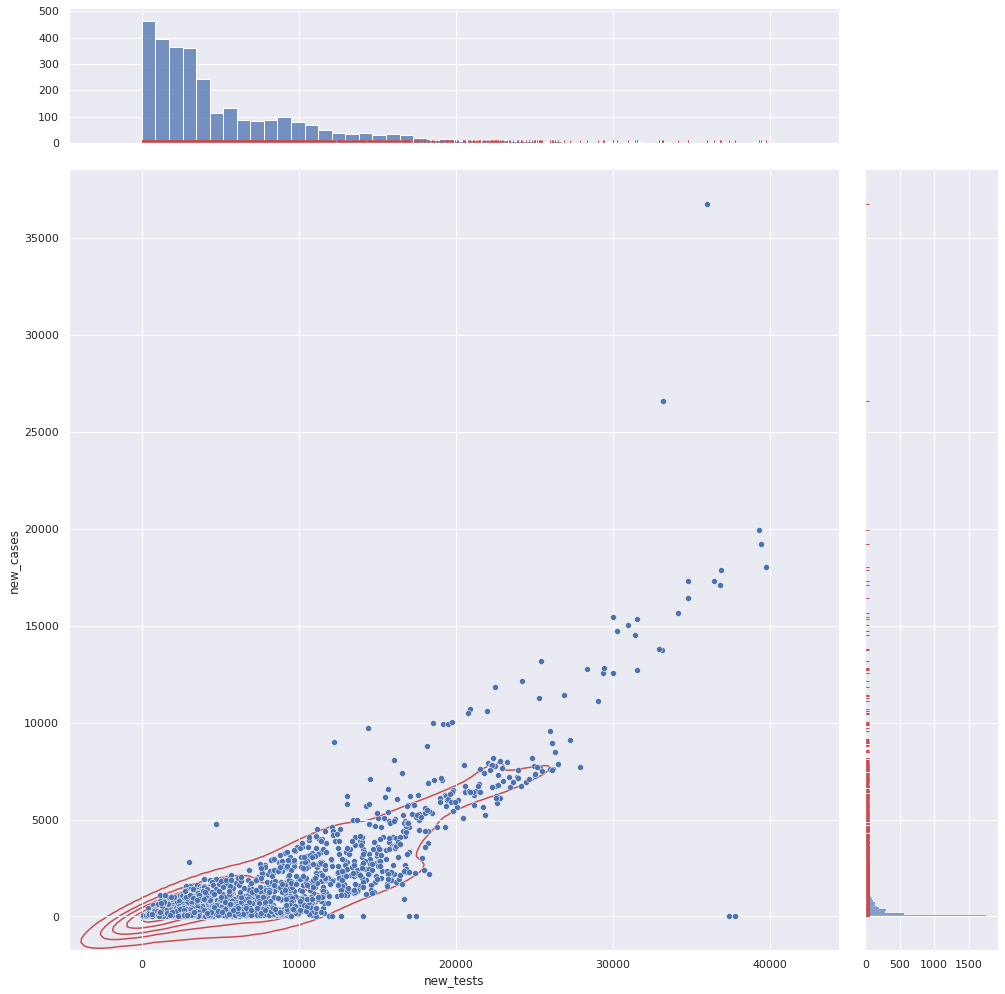

In [51]:
h = sns.jointplot("new_tests", "new_cases", data=balkan, marginal_ticks=True, height=14)
h.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
h.plot_marginals(sns.rugplot, color="r", clip_on=False)

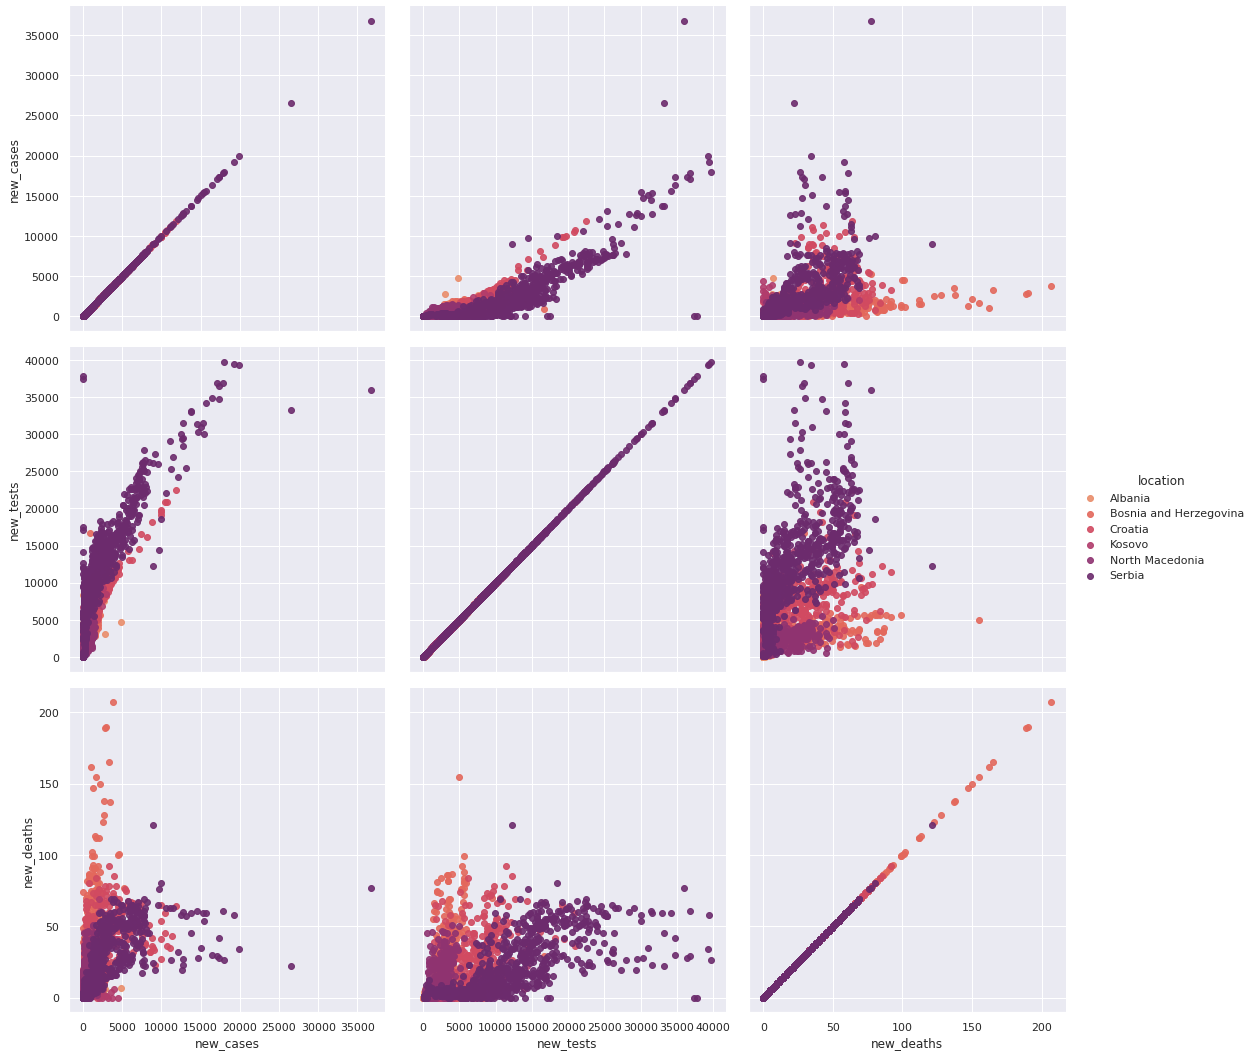

In [52]:

g = sns.PairGrid(data=balkan, vars=['new_cases', 'new_tests', 'new_deaths'], hue='location', palette="flare", height=5)
g.map(plt.scatter, alpha=0.9)
g.add_legend();